In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from scipy.stats import chi2_contingency, levene, kruskal,spearmanr
from datetime import datetime

In [2]:
df = pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')

In [3]:
# Preview of the first two rows of the dataset
df.head(2)

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
0,1,IT,Male,55,Specialist,19-01-22 8:03,High School,5,6750,33,32,22,2,0,14,66,0,2.63
1,2,Finance,Male,29,Developer,18-04-24 8:03,High School,5,7500,34,34,13,14,100,12,61,2,1.72


**Basic info about the columns in the dataset**
* Employee_ID: Unique identifier for each employee.
* Department: The department in which the employee works.
* Gender: Gender of the employee.
* Age: Employee's age.
* Job_Title: The role held by the employee.
* Hire_Date: The date the employee was hired.
* Education_Level: Highest educational qualification.
* Performance_Score: Employee's performance rating.
* Monthly_Salary: The employee's monthly salary in USD.
* Work_Hours_Per_Week: Number of hours worked per week.
* Projects_Handled: Total number of projects handled by the employee.
* Overtime_Hours: Total overtime hours worked in the last year.
* Sick_Days: Number of sick days taken by the employee.
* Remote_Work_Frequency: Percentage of time worked remotely.
* Team_Size: Number of people in the employee's team.
* Training_Hours: Number of hours spent in training.
* Promotions: Number of promotions received during their tenure.
* Employee_Satisfaction_Score: Employee satisfaction rating.

In [4]:
# Datatypes verification of all the column
df.dtypes

,0
Employee_ID,int64
Department,object
Gender,object
Age,int64
Job_Title,object
Hire_Date,object
Education_Level,object
Performance_Score,int64
Monthly_Salary,int64
Work_Hours_Per_Week,int64


**Each column in the dataset has been correctly assigned to its datatype except the
Hire_date**

In [5]:
# Display the Shape of the dataset
df.shape

(100000, 18)

**There are 100000 rows and 19 columns in the dataset**

In [6]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Education_Level              100000 non-null  object 
 7   Performance_Score            100000 non-null  int64  
 8   Monthly_Salary               100000 non-null  int64  
 9   Work_Hours_Per_Week          100000 non-null  int64  
 10  Projects_Handled             100000 non-null  int64  
 11  Overtime_Hours               100000 non-null  int64  
 12  Sick_Days                    100000 non-null  int64  
 13  

**We can explore the column name, Non-Null value Count and data type of each column in the dataset**

In [7]:
# Display the unique values in each column
df.nunique()

,0
Employee_ID,100000
Department,9
Gender,3
Age,39
Job_Title,7
Hire_Date,3650
Education_Level,4
Performance_Score,5
Monthly_Salary,28
Work_Hours_Per_Week,31


**The count of unique values present in each column of the dataset.**

In [8]:
# convert the data type of Hire_Date to datetime
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'])

In [9]:
# let's check the Years of service from the Hire_date
current_Year = datetime.now().year
df['Years_of_service'] = current_Year - df['Hire_Date'].dt.year

In [10]:
# Monthly salary is given in USD lets convert it into INR, assuming that exchange rate of 1 USD = 84 INR
df['Monthly_Salary'] = df['Monthly_Salary'] * 84

**Taking the logarithm of monthly_salary will be useful for better visualization and reduce the skewness. However, it does not necessarily make the data to be a normal.**

In [11]:
# Log on monthly_salary
df['Monthly_Salary'] = np.log(df['Monthly_Salary'])

In [12]:
# Check for the duplicated rows
df.duplicated().sum()

0

**There is no duplicated rows present in the dataset.**

In [13]:
# Check for the null values in percentage
(df.isna().sum()/len(df))*100

,0
Employee_ID,0.0
Department,0.0
Gender,0.0
Age,0.0
Job_Title,0.0
Hire_Date,0.0
Education_Level,0.0
Performance_Score,0.0
Monthly_Salary,0.0
Work_Hours_Per_Week,0.0


**None of the columns in the dataset having the null values**

**There are 100000 distinct values in employee id, so Dropping this will not affect the analysis.**

In [14]:
df.drop(['Employee_ID'],inplace = True, axis = 1)

                                  **Statistcal Summary**

In [15]:
# Describing the statistic information such as count, mean, standard Deviation, min, (25th, 50th, 75th)percentiles, max
df.describe(include = 'all')

,Department,Gender,Age,Job_Title,Hire_Date,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Years_of_service
count,100000,100000,100000.000000,100000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
unique,9,3,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Marketing,Male,NaN,Specialist,NaN,Bachelor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,11216,48031,NaN,14507,NaN,50041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,41.029410,NaN,2019-09-15 05:14:52.799999488,NaN,2.995430,13.171562,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088,4.796030
min,NaN,NaN,22.000000,NaN,2014-01-10 08:03:00,NaN,1.000000,12.686645,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,NaN,31.000000,NaN,2017-03-19 08:03:00,NaN,2.000000,12.996800,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000,2.000000
50%,NaN,NaN,41.000000,NaN,2019-09-22 08:03:00,NaN,3.000000,13.210374,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000,5.000000
75%,NaN,NaN,51.000000,NaN,2022-03-14 08:03:00,NaN,4.000000,13.353475,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000,7.000000
max,NaN,NaN,60.000000,NaN,2024-12-08 08:03:00,NaN,5.000000,13.535797,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000,10.000000


In [16]:
# Numerical columns
num_cols = df.select_dtypes(include = 'number').columns.to_list()
num_cols

['Age',
 'Performance_Score',
 'Monthly_Salary',
 'Work_Hours_Per_Week',
 'Projects_Handled',
 'Overtime_Hours',
 'Sick_Days',
 'Remote_Work_Frequency',
 'Team_Size',
 'Training_Hours',
 'Promotions',
 'Employee_Satisfaction_Score',
 'Years_of_service']

In [17]:
# Categorical columns
cat_cols = df.select_dtypes(include = 'object').columns.to_list()
cat_cols

['Department', 'Gender', 'Job_Title', 'Education_Level']

**Exploratory Data Analysis**
* Univariate Analysis
* Bivariate Analysis (Target Vs Categorical Features)
* MultiVariate Numerical Analysis


                              **Univariate Analysis**

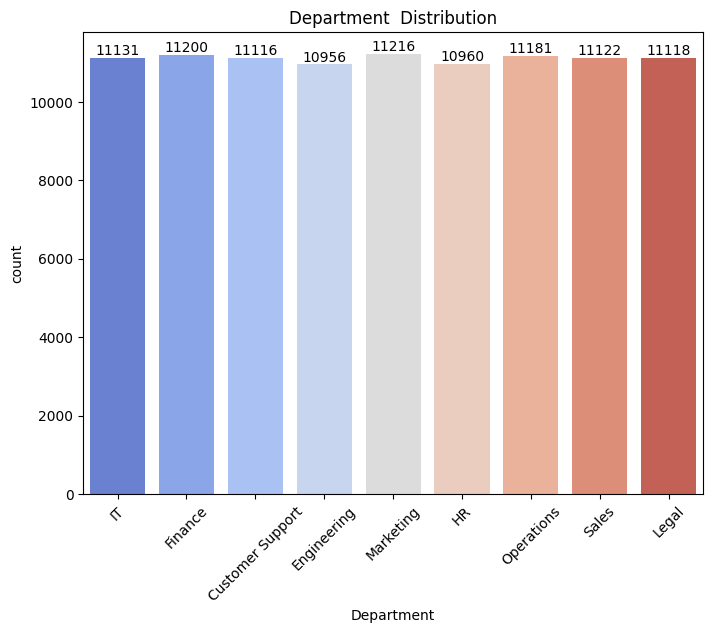

In [18]:
# Graphical representation for Department
plt.figure(figsize = (8,6))
ax = sns.countplot(x = 'Department', data = df, palette = 'coolwarm')
for p in ax.patches:
  ax.annotate(format(p.get_height(),'.0f'),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',va='center',
              xytext=(0,5),textcoords='offset points',fontsize=10,color='black')
plt.title('Department  Distribution')
plt.xticks(rotation = 45)
plt.show()

In [19]:
Gender = df['Gender'].value_counts().reset_index()
Gender

,Gender,count
0,Male,48031
1,Female,48001
2,Other,3968


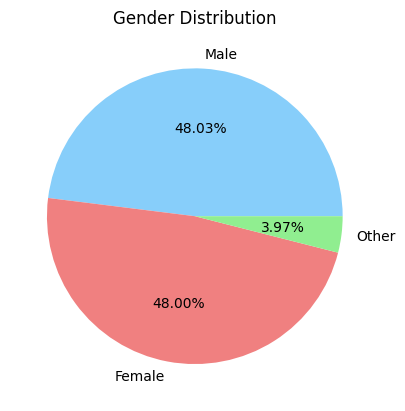

In [20]:
# Graphical representation for gender
plt.pie(Gender['count'],labels = Gender['Gender'], autopct = '%2.2f%%', colors = ['Lightskyblue', 'Lightcoral','Lightgreen'])
plt.title('Gender Distribution')
plt.show()

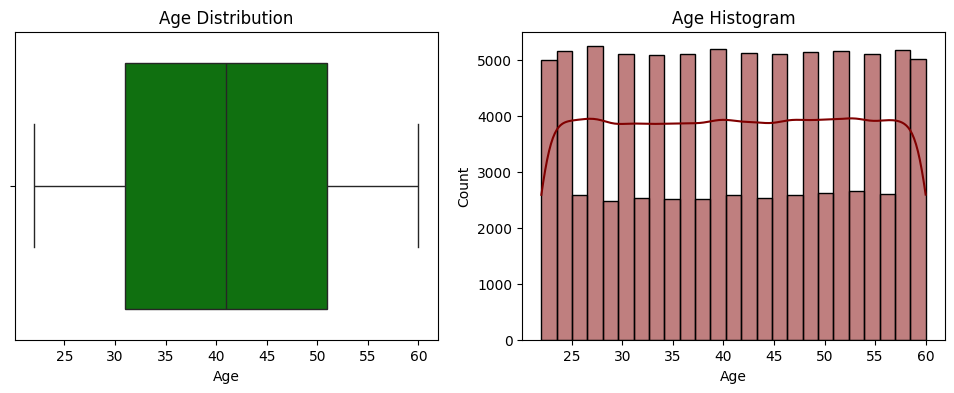

In [21]:
# Graphical representation for Age
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
ax = sns.boxplot(x = 'Age', data = df, color = 'green')
plt.title('Age Distribution')

plt.subplot(1,2,2)
sns.histplot(x ='Age', data =df, bins=25, kde=True, color='maroon')
plt.title('Age Histogram')
plt.show()

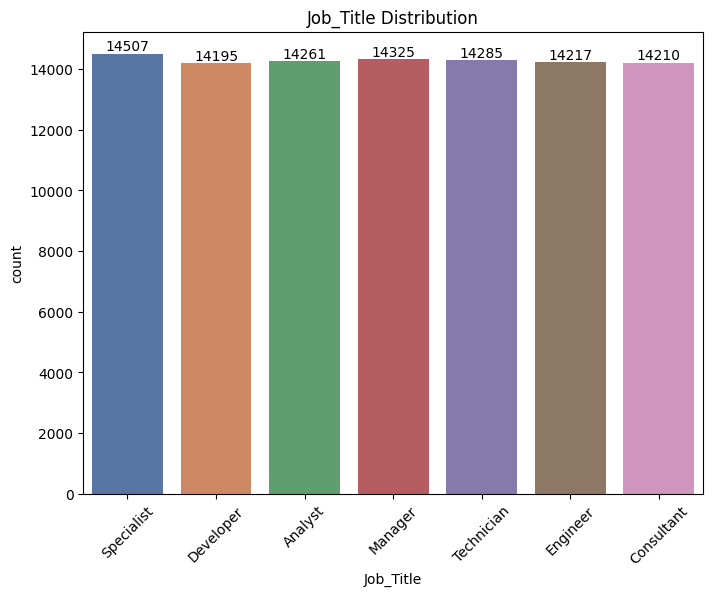

In [22]:
# Graphical representation for Job_Title
plt.figure(figsize = (8,6))
ax = sns.countplot(x = 'Job_Title', data = df, palette = 'deep')
for p in ax.patches:
  ax.annotate(format(p.get_height(),'.0f'),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',va='center',
              xytext=(0,5),textcoords='offset points',fontsize=10,color='black')
plt.title('Job_Title Distribution')
plt.xticks(rotation = 45)
plt.show()

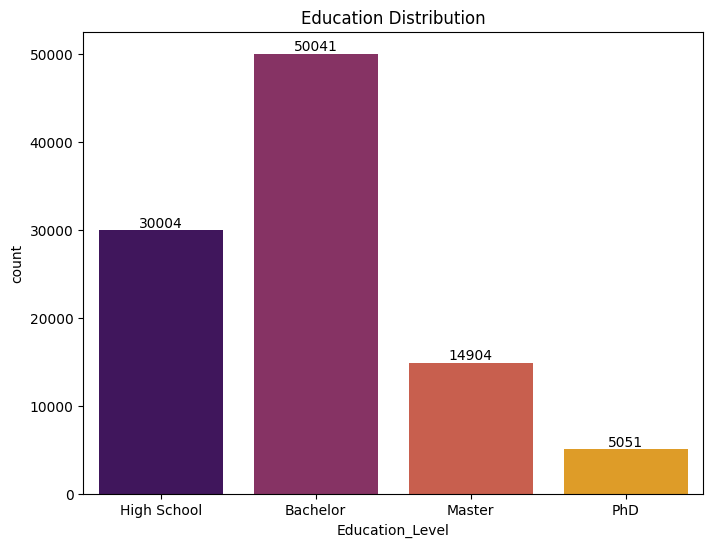

In [23]:
# Graphical representation for Education_Level
plt.figure(figsize = (8,6))
ax = sns.countplot(x = 'Education_Level', data = df, palette = 'inferno')
for p in ax.patches:
  ax.annotate(format(p.get_height(),'.0f'),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',va='center',
              xytext=(0,5),textcoords='offset points',fontsize=10,color='black')
plt.title('Education Distribution')
plt.show()

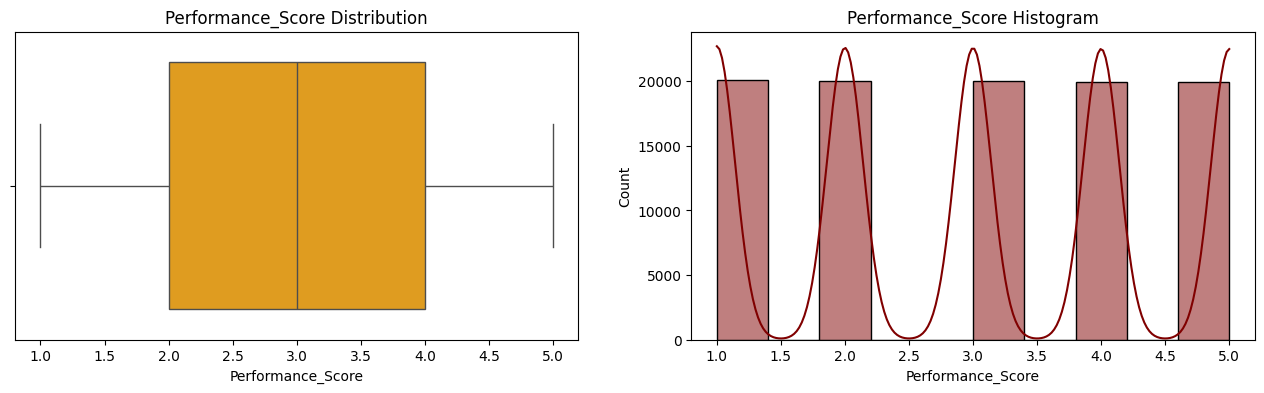

In [24]:
# Graphical representation for Performance_Score
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
ax = sns.boxplot(x = 'Performance_Score', data = df, color = 'orange')
plt.title('Performance_Score Distribution')

plt.subplot(1,2,2)
sns.histplot(x ='Performance_Score', data =df, bins=10, kde=True, color='maroon')
plt.title('Performance_Score Histogram')
plt.show()

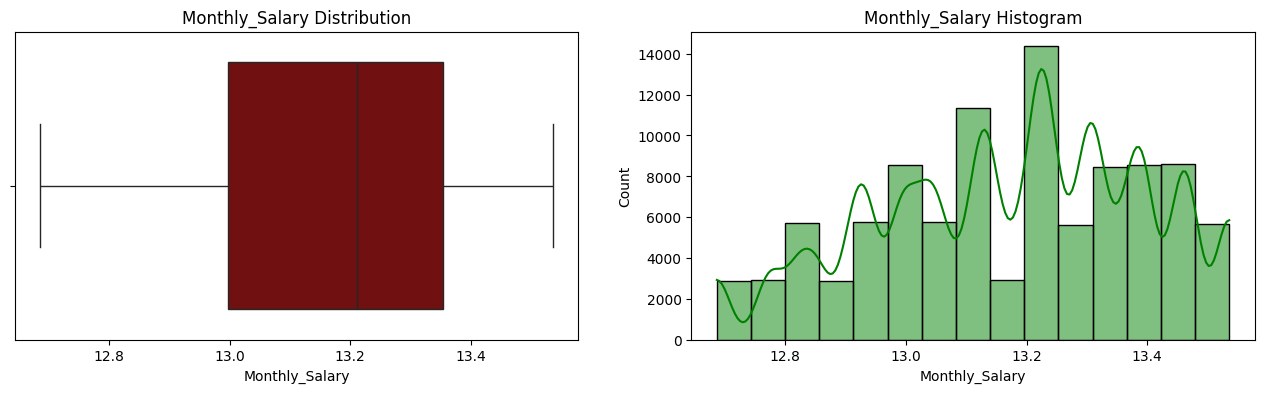

In [25]:
# # Graphical representation for Monthly_Salary
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
ax = sns.boxplot(x = 'Monthly_Salary', data = df, color = 'maroon')
plt.title('Monthly_Salary Distribution')

plt.subplot(1,2,2)
sns.histplot(x ='Monthly_Salary', data =df, bins=15, kde=True, color='green')
plt.title('Monthly_Salary Histogram')
plt.show()

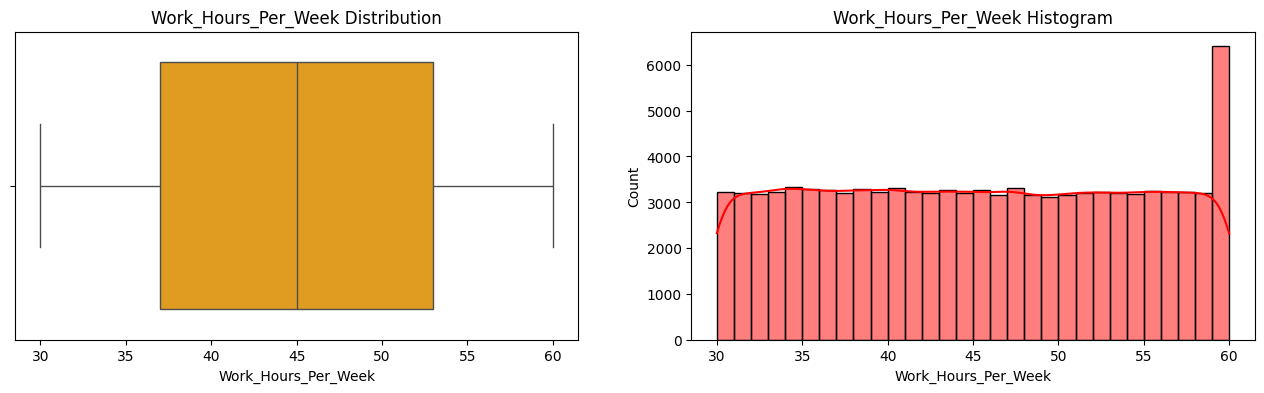

In [26]:
## Graphical representation for Work_Hours_Per_Week
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
ax = sns.boxplot(x = 'Work_Hours_Per_Week', data = df, color = 'orange')
plt.title('Work_Hours_Per_Week Distribution')

plt.subplot(1,2,2)
sns.histplot(x ='Work_Hours_Per_Week', data =df, bins=30, kde=True, color='red')
plt.title('Work_Hours_Per_Week Histogram')
plt.show()

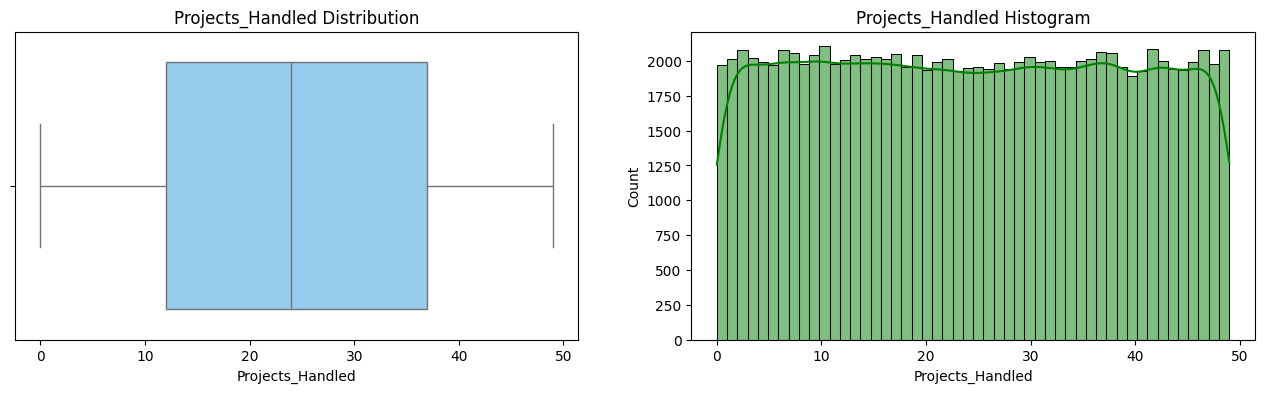

In [27]:
# Graphical representation for Projects_Handled
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
ax = sns.boxplot(x = 'Projects_Handled', data = df, color = 'lightskyblue')
plt.title('Projects_Handled Distribution')

plt.subplot(1,2,2)
sns.histplot(x ='Projects_Handled', data =df, bins=50, kde=True, color='green')
plt.title('Projects_Handled Histogram')
plt.show()

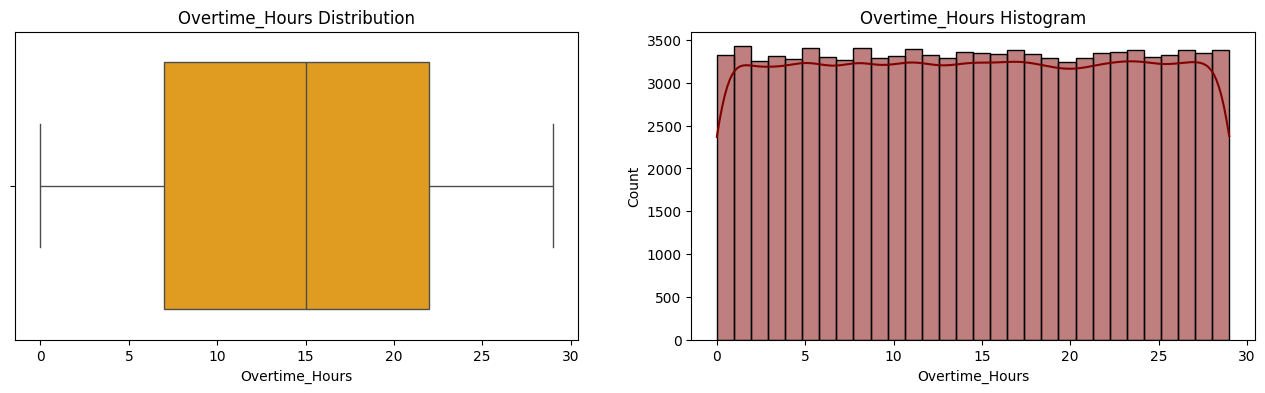

In [28]:
# Graphical representation for Overtime_Hours
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
ax = sns.boxplot(x = 'Overtime_Hours', data = df, color = 'orange')
plt.title('Overtime_Hours Distribution')

plt.subplot(1,2,2)
sns.histplot(x ='Overtime_Hours', data =df, bins=30, kde=True, color='maroon')
plt.title('Overtime_Hours Histogram')
plt.show()

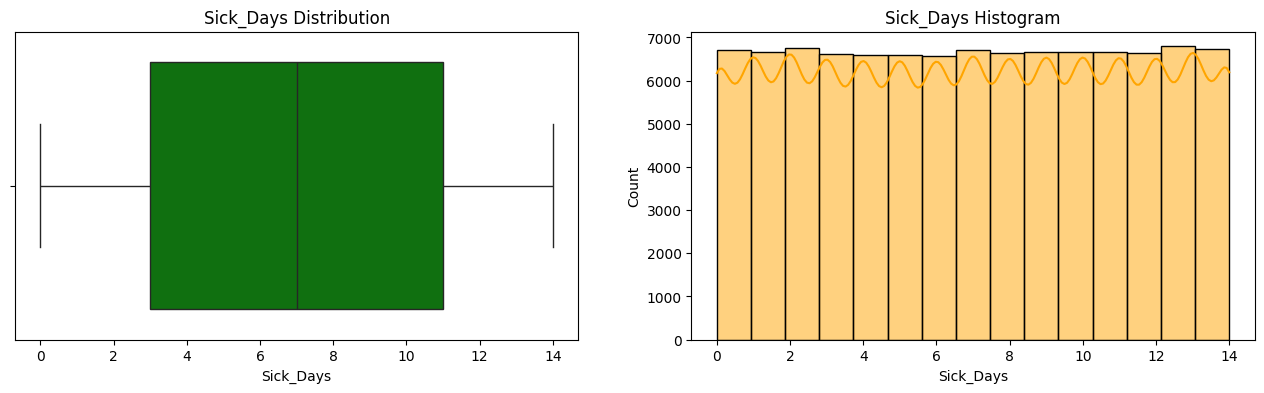

In [29]:
# Graphical representation for Sick_days
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
ax = sns.boxplot(x = 'Sick_Days', data = df, color = 'green')
plt.title('Sick_Days Distribution')

plt.subplot(1,2,2)  # Histogram
sns.histplot(x ='Sick_Days', data =df, bins=15, kde=True, color='orange')
plt.title('Sick_Days Histogram')
plt.show()

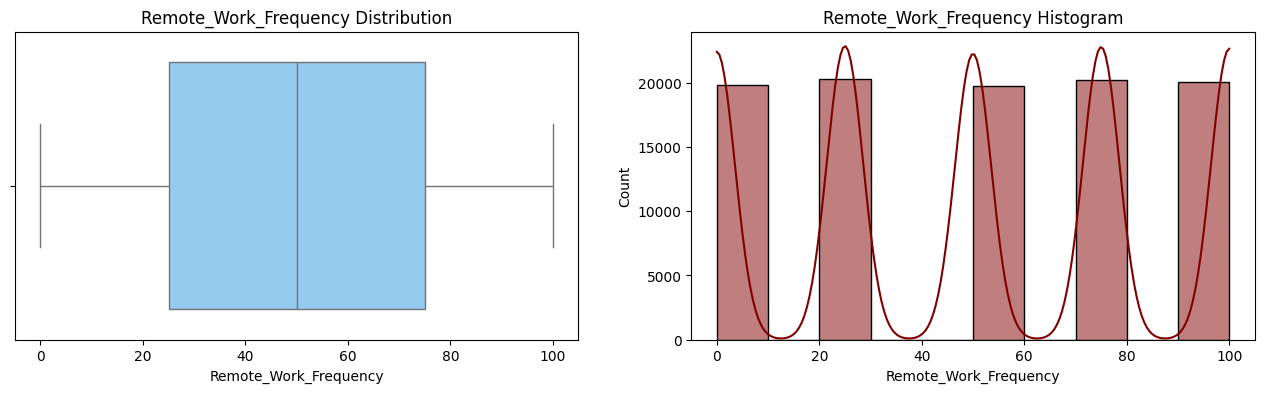

In [30]:
# Graphical representation for Remote_Work_Frequency
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
ax = sns.boxplot(x = 'Remote_Work_Frequency', data = df, color = 'lightskyblue')
plt.title('Remote_Work_Frequency Distribution')

plt.subplot(1,2,2)  # Histogram
sns.histplot(x ='Remote_Work_Frequency', data =df, bins=10, kde=True, color='maroon')
plt.title('Remote_Work_Frequency Histogram')
plt.show()

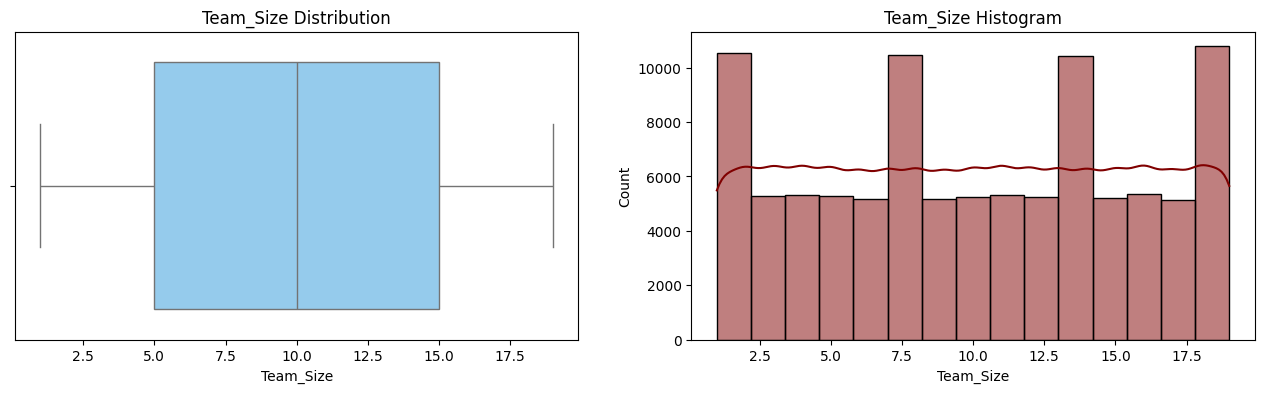

In [31]:
# Graphical representation for team_Size
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
ax = sns.boxplot(x = 'Team_Size', data = df, color = 'lightskyblue')
plt.title('Team_Size Distribution')

plt.subplot(1,2,2)
sns.histplot(x ='Team_Size', data =df, bins=15, kde=True, color='maroon')
plt.title('Team_Size Histogram')
plt.show()

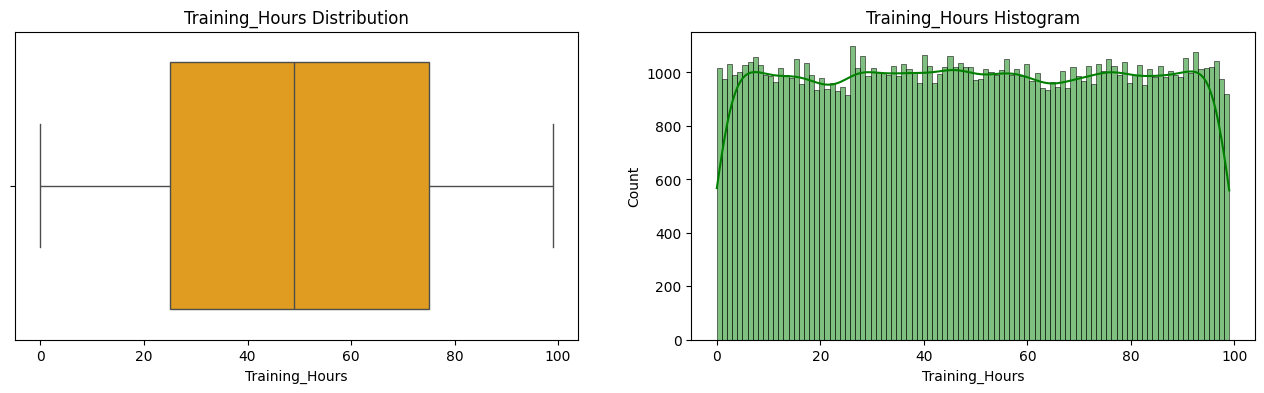

In [32]:
# Graphical representation for training_hours
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
ax = sns.boxplot(x = 'Training_Hours', data = df, color = 'orange')
plt.title('Training_Hours Distribution')

plt.subplot(1,2,2)
sns.histplot(x ='Training_Hours', data =df, bins=100, kde=True, color='green')
plt.title('Training_Hours Histogram')
plt.show()

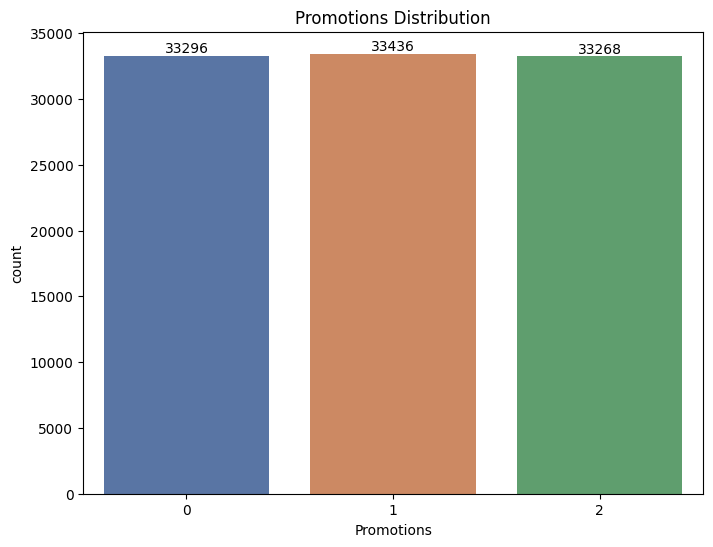

In [33]:
# Graphical representation for Promotions
plt.figure(figsize = (8,6))
ax = sns.countplot(x = 'Promotions',data = df, palette = 'deep')
for p in ax.patches:
  ax.annotate(format(p.get_height(),'.0f'),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',va='center',
              xytext=(0,5),textcoords='offset points',fontsize=10,color='black')
plt.title('Promotions Distribution')
plt.show()

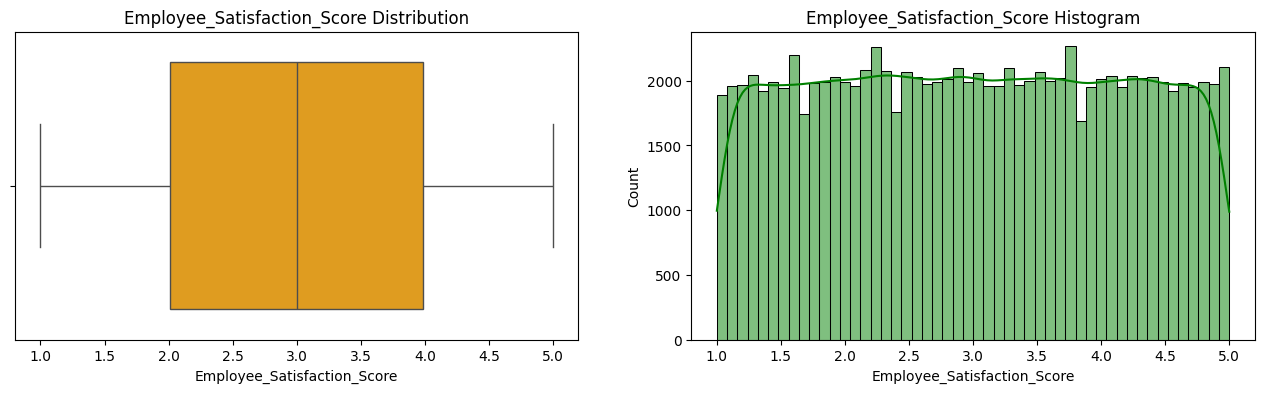

In [34]:
# Graphical representation for Employee_Satisfaction_score
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
ax = sns.boxplot(x = 'Employee_Satisfaction_Score', data = df, color = 'orange')
plt.title('Employee_Satisfaction_Score Distribution')

plt.subplot(1,2,2)
sns.histplot(x ='Employee_Satisfaction_Score', data =df, bins=50, kde=True, color='green')
plt.title('Employee_Satisfaction_Score Histogram')
plt.show()

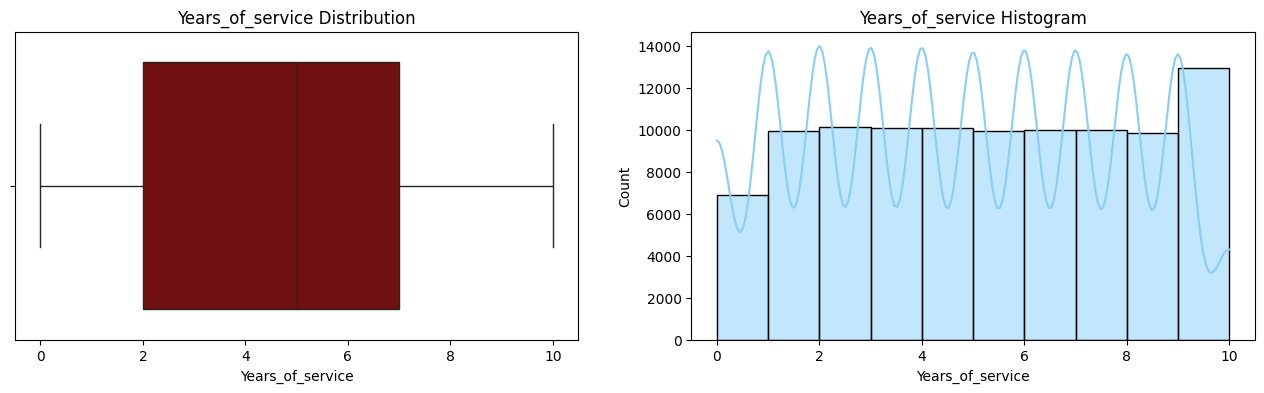

In [35]:
# Graphical representation for Years of service
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
ax = sns.boxplot(x = 'Years_of_service', data = df, color = 'maroon')
plt.title('Years_of_service Distribution')

plt.subplot(1,2,2)
sns.histplot(x ='Years_of_service', data =df, bins=10, kde=True, color='lightskyblue')
plt.title('Years_of_service Histogram')
plt.show()

                              **Bivariate Analysis**

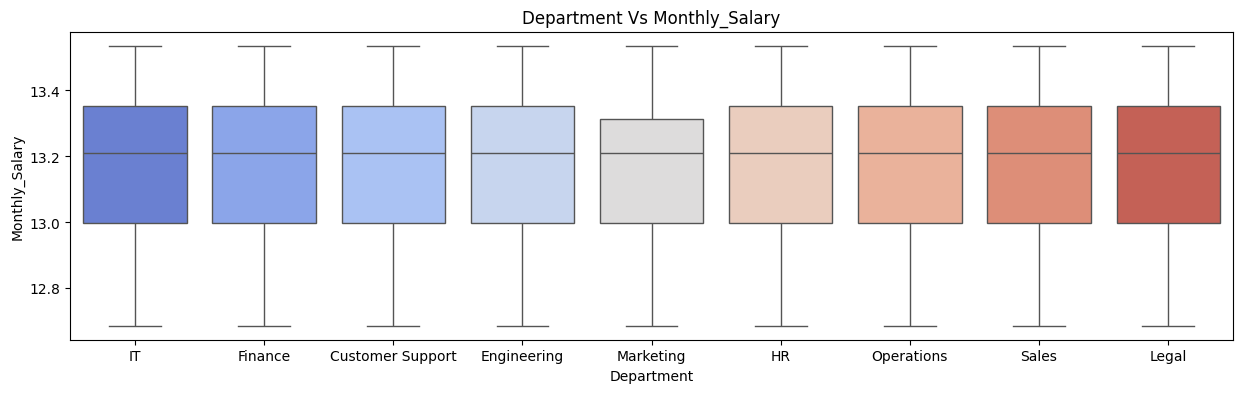

In [36]:
# Department Vs Monthly_Salary
plt.figure(figsize = (15,4))
sns.boxplot(x = 'Department',y = 'Monthly_Salary',data = df, palette = 'coolwarm')
plt.title('Department Vs Monthly_Salary')
plt.show()

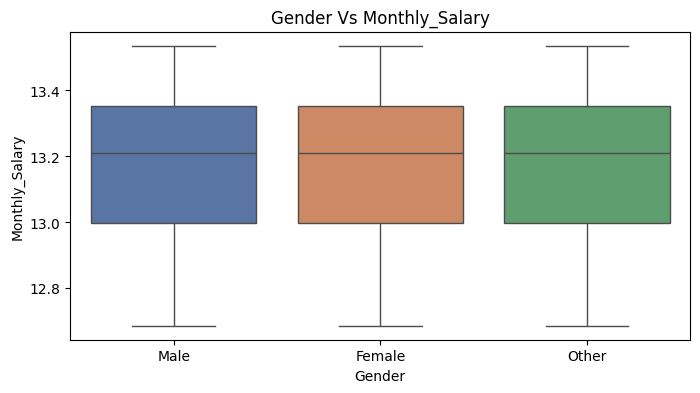

In [37]:
# Gender Vs Monthly_Salary
plt.figure(figsize = (8,4))
sns.boxplot(x = 'Gender',y = 'Monthly_Salary',data = df, palette = 'deep')
plt.title('Gender Vs Monthly_Salary')
plt.show()

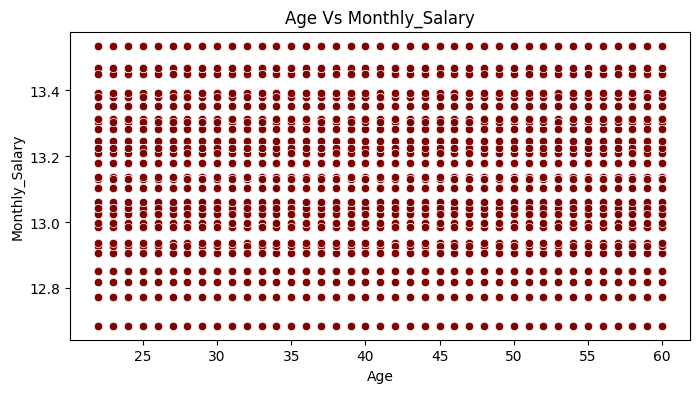

In [38]:
# Age Vs Monthly_Salary
plt.figure(figsize = (8,4))
sns.scatterplot(x = 'Age',y = 'Monthly_Salary',data = df, color = 'Maroon')
plt.title('Age Vs Monthly_Salary')
plt.show()

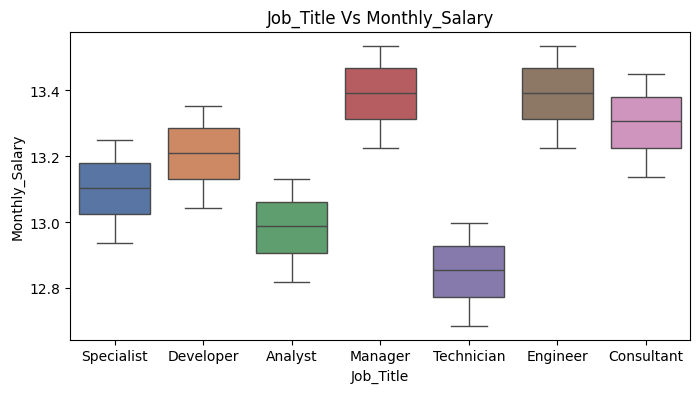

In [39]:
# Job_Title Vs Monthly_Salary
plt.figure(figsize = (8,4))
sns.boxplot(x = 'Job_Title',y = 'Monthly_Salary',data = df, palette = 'deep')
plt.title('Job_Title Vs Monthly_Salary')
plt.show()

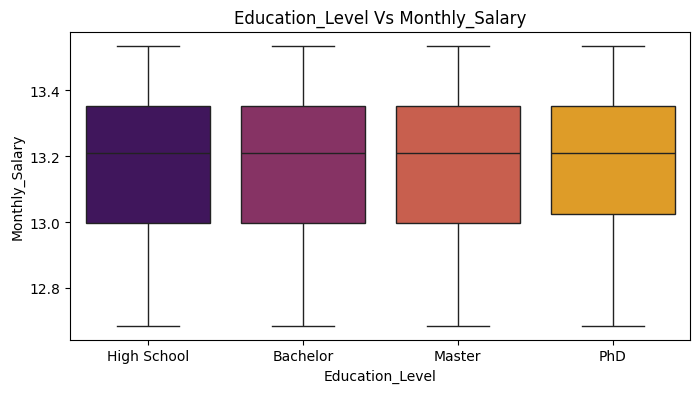

In [40]:
# Education_Level Vs Monthly_Salary
plt.figure(figsize = (8,4))
sns.boxplot(x = 'Education_Level',y = 'Monthly_Salary',data = df, palette = 'inferno')
plt.title('Education_Level Vs Monthly_Salary')
plt.show()

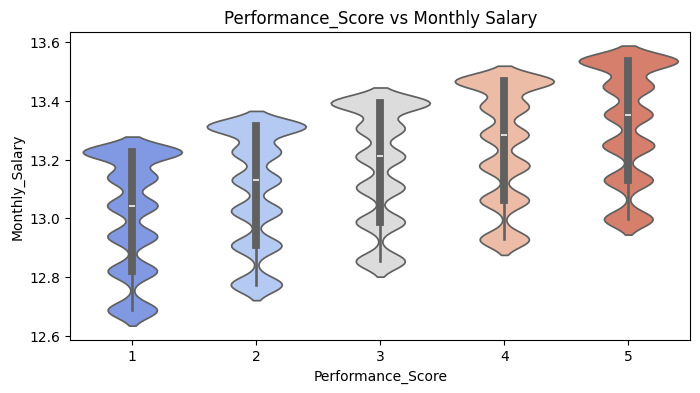

In [41]:
# Performance_Score vs Monthly Salary
plt.figure(figsize=(8,4))
sns.violinplot(x='Performance_Score', y='Monthly_Salary', data=df, palette='coolwarm')
plt.title('Performance_Score vs Monthly Salary')
plt.show()


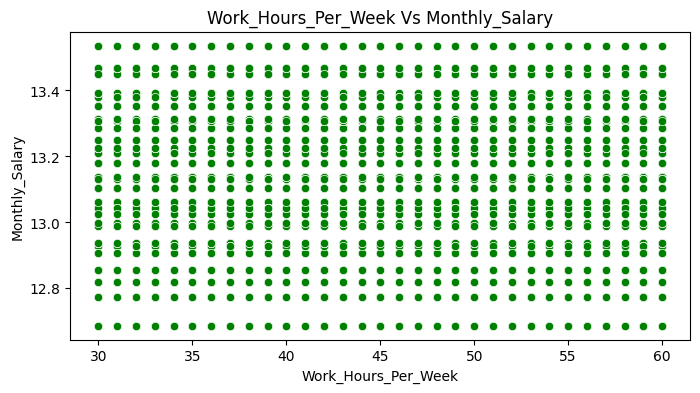

In [42]:
# Work_Hours_Per_Week Vs Monthly_Salary
plt.figure(figsize = (8,4))
sns.scatterplot(x = 'Work_Hours_Per_Week',y = 'Monthly_Salary',data = df, color = 'Green')
plt.title('Work_Hours_Per_Week Vs Monthly_Salary')
plt.show()

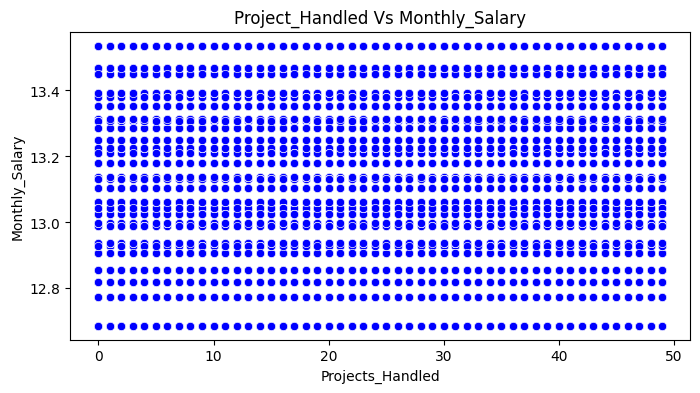

In [43]:
# Project_Handled Vs Monthly_Salary
plt.figure(figsize = (8,4))
sns.scatterplot(x = 'Projects_Handled',y = 'Monthly_Salary',data = df, color = 'blue')
plt.title('Project_Handled Vs Monthly_Salary')
plt.show()

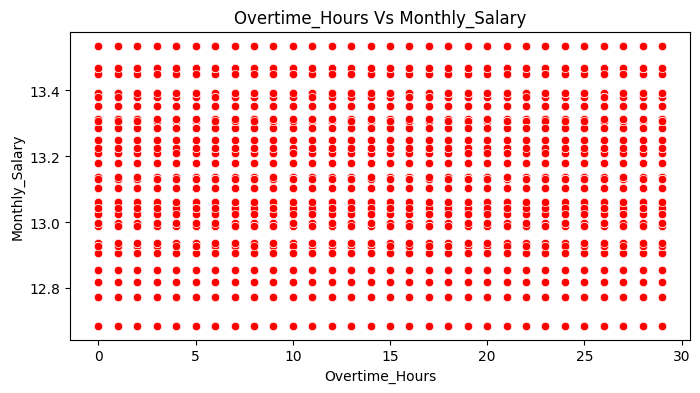

In [44]:
# Overtime_Hours Vs Monthly_Salary
plt.figure(figsize = (8,4))
sns.scatterplot(x = 'Overtime_Hours',y = 'Monthly_Salary',data = df, color = 'red')
plt.title('Overtime_Hours Vs Monthly_Salary')
plt.show()

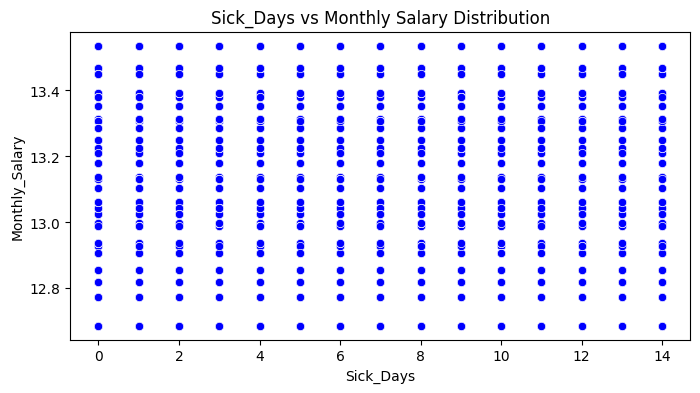

In [45]:
# Sick_Days Vs Monthly_Salary
plt.figure(figsize=(8,4))
sns.scatterplot(x='Sick_Days', y='Monthly_Salary', data=df, color = 'blue')
plt.title('Sick_Days vs Monthly Salary Distribution')
plt.show()

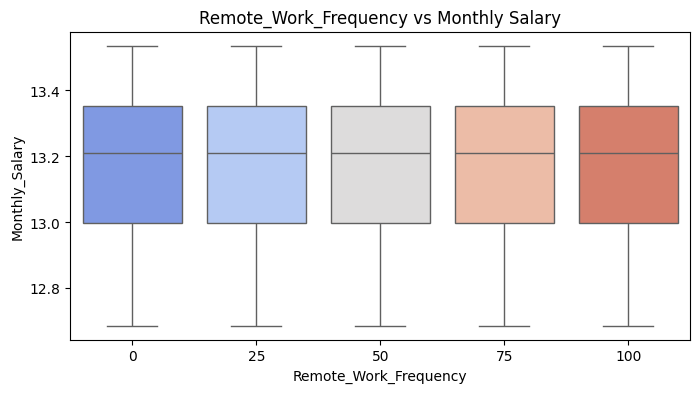

In [46]:
# Remote_Work_Frequency vs Monthly Salary
plt.figure(figsize=(8,4))
sns.boxplot(x='Remote_Work_Frequency', y='Monthly_Salary', data=df, palette='coolwarm')
plt.title('Remote_Work_Frequency vs Monthly Salary')
plt.show()

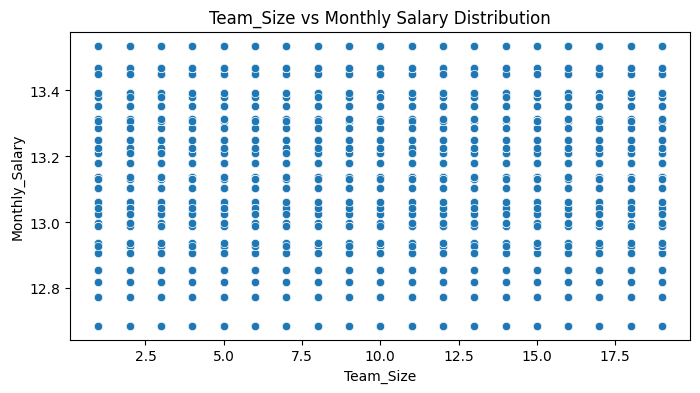

In [47]:
# Team_Size vs Monthly Salary Distribution
plt.figure(figsize=(8,4))
sns.scatterplot(x='Team_Size', y='Monthly_Salary', data=df)
plt.title('Team_Size vs Monthly Salary Distribution')
plt.show()

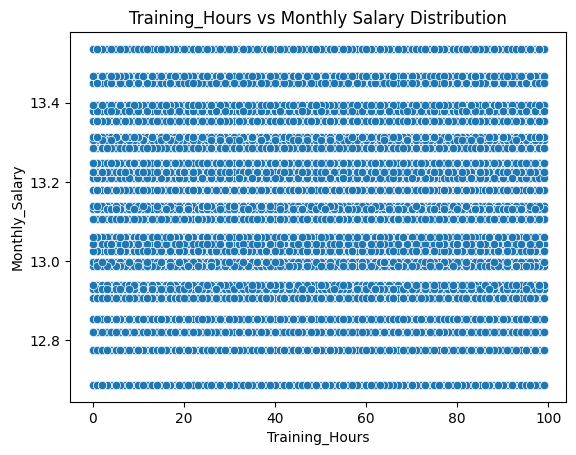

In [48]:
# Training_Hours vs Monthly Salary Distribution
sns.scatterplot(x='Training_Hours', y='Monthly_Salary', data=df)
plt.title('Training_Hours vs Monthly Salary Distribution')
plt.show()

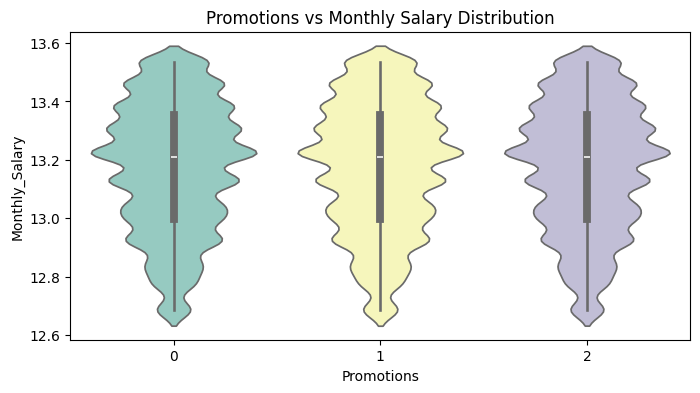

In [49]:
# Promotions vs Monthly Salary Distribution
plt.figure(figsize=(8,4))
sns.violinplot(x='Promotions', y='Monthly_Salary', data=df, palette='Set3')
plt.title('Promotions vs Monthly Salary Distribution')
plt.show()

**Here we don't have a upper whisker ie in our data the 75 percentila and the 100 percentile are same.**

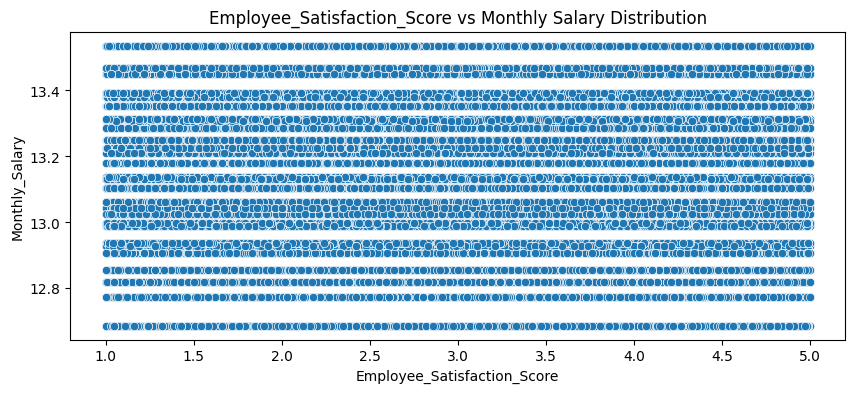

In [50]:
# Employee_Satisfaction_Score vs Monthly Salary
plt.figure(figsize=(10,4))
sns.scatterplot(x='Employee_Satisfaction_Score', y='Monthly_Salary', data=df)
plt.title('Employee_Satisfaction_Score vs Monthly Salary Distribution')
plt.show()

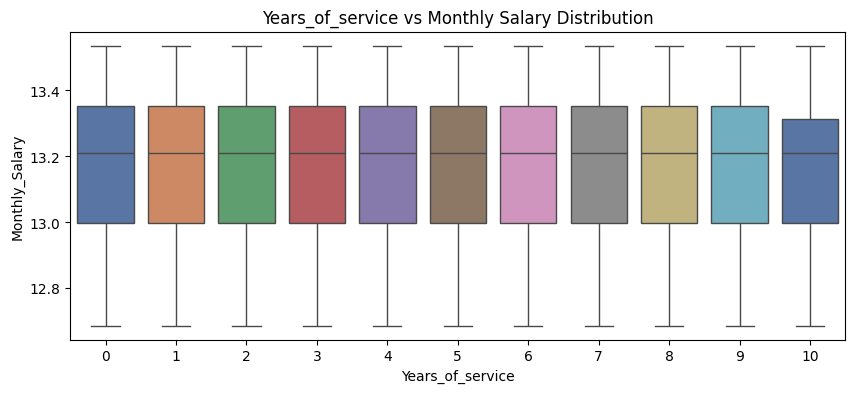

In [51]:
# Years_of_service vs Monthly Salary Distribution
plt.figure(figsize=(10,4))
sns.boxplot(x='Years_of_service', y='Monthly_Salary', data=df, palette = 'deep')
plt.title('Years_of_service vs Monthly Salary Distribution')
plt.show()

                      **Multivariate Analysis**

<Axes: >

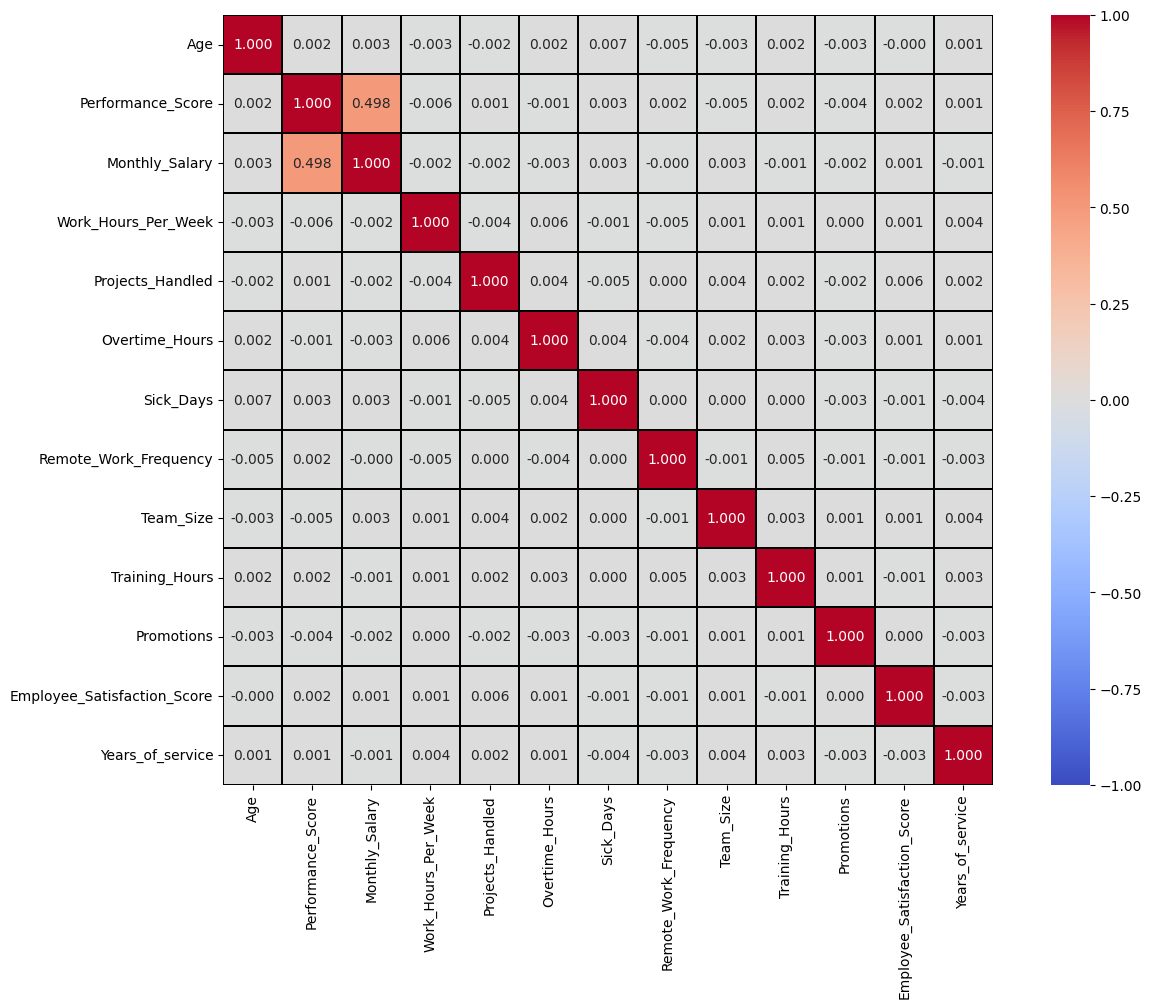

In [52]:
# Heatmap Representation for Correlation Effect
plt.figure(figsize=(15,10))
sns.heatmap(df[num_cols].corr(), annot = True, linecolor = 'black', linewidth = 0.02, square=True, cmap = "coolwarm", fmt = '.3f', vmin = -1, vmax = 1)

* All of them are perfect negative correlated except Monthly Salary and Performance Score.
* Performance Score is positively correlated with Monthly Salary, as the correlation value is near to 0.5.
* This positive correlation suggests that as Performance Score increases, Monthly Salary tends to increase as well. Similarly, if Performance Score decreases, Monthly Salary is likely to decrease.

          **Hypothesis test**

**Is the Monthly salary significantly different across department?**
* Appropriate test = One-Way Anova Test
  * Assumptions
    * Normality (qqplot, Shapiro Wilk test)
    * Equality of variance (Levene's test)
    * Independance (Observations are independent on each other)

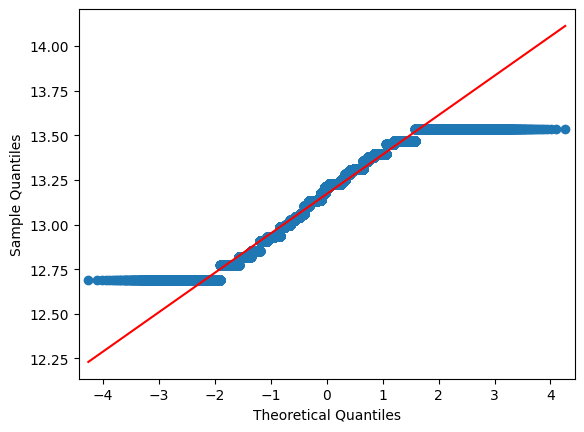

In [53]:
# Normality Check
sm.qqplot(df['Monthly_Salary'], line = 's')
plt.show()

* **As the data deviates from the red line especially at the tails, shows that the data is not perfectly normal.**
* Here Normality Fails let check the Equality of variance across the department using levene's test.

In [54]:
marketing = df[df['Department'] =='Marketing']['Monthly_Salary']
finance = df[df['Department'] =='Finance']['Monthly_Salary']
operations = df[df['Department'] =='Operations']['Monthly_Salary']
IT = df[df['Department'] =='IT']['Monthly_Salary']
sales = df[df['Department'] =='Sales']['Monthly_Salary']
legal = df[df['Department'] =='Legal']['Monthly_Salary']
CS = df[df['Department'] =='Customer Support']['Monthly_Salary']
hr = df[df['Department'] =='HR']['Monthly_Salary']
eng = df[df['Department'] =='Engineering']['Monthly_Salary']

**Levene's Test**
* Null hypothesis = the variance of different groups are equal
* Alternative hypothesis = the variance of different groups are not equal

In [55]:
stat, pvalue = levene(marketing, finance, operations, IT, sales, legal, CS,  hr, eng)
alpha = 0.05
if pvalue < alpha:
  print(f"pvalue = {pvalue}, Reject Null hypothesis, The variance of different groups are not equal." )
else:
  print(f"pvalue = {pvalue}, Fail to reject Null hypothesis, The variance of different groups are equal." )

pvalue = 0.16532071309918955, Fail to reject Null hypothesis, The variance of different groups are equal.


**Anova is not performed because of the non-normality of the data**,
However we can perform kruskal Wallis test.

**Kruskal walli's Test**
* Null Hypothesis : The population for all groups have the same median.
* Alternative Hypothesis : Atleast one the population have a different median.


In [56]:
stat, pvalue = kruskal(marketing, finance, operations, IT, sales, legal, CS,  hr, eng)
alpha = 0.05
if pvalue < alpha:
  print(f"pvalue = {pvalue}, Reject Null hypothesis, Atleast one the popualtion have a different median." )
else:
  print(f"pvalue = {pvalue}, Fail to reject Null hypothesis, The population for all groups have the same median." )

pvalue = 0.5002759767747731, Fail to reject Null hypothesis, The population for all groups have the same median.


**Hypothesis test on Age Vs Monthly_Salary**

* **None of the relationship are shown clearly between the age and the monthly_salary**
* let's perform the correlation test
* Appropriate_test = Spearman rank correlation( non-parametric data)
* Null Hypothesis = There is no correlation between monthly salary and the age
* Alternative Hypothesis = There is correlation between monthly salary and the age


In [57]:
stat, pvalue = spearmanr(df['Age'], df['Monthly_Salary'])
alpha = 0.05
if pvalue < alpha:
  print(f"pvalue = {pvalue}, Reject Null hypothesis, There is correlation between monthly salary and the age." )
else:
  print(f"pvalue = {pvalue}, Fail to reject Null hypothesis, There is no correlation between monthly salary and the age." )

pvalue = 0.25750056920029396, Fail to reject Null hypothesis, There is no correlation between monthly salary and the age.


**Hypothesis test on Job_title Vs Monthly_Salary**

* Null Hypothesis: There is no significant difference on the average between job_role and the monthly_salary
* Alternative Hypothesis: There is significant difference on the average between job_role and the monthly_salary


In [58]:
specialist = df[df['Job_Title'] =='Specialist']['Monthly_Salary']
manager = df[df['Job_Title'] =='Manager']['Monthly_Salary']
tech = df[df['Job_Title'] =='Technician']['Monthly_Salary']
analyst = df[df['Job_Title'] =='Analyst']['Monthly_Salary']
eng = df[df['Job_Title'] =='Engineer']['Monthly_Salary']
cons = df[df['Job_Title'] =='Consultant']['Monthly_Salary']
dev = df[df['Job_Title'] =='Developer']['Monthly_Salary']

**As we know that Monthly salary is not normally distributed so we perform the levene's test**

In [59]:
stat, pvalue = levene(specialist, manager, tech, analyst, eng, cons,dev)
alpha = 0.05
if pvalue < alpha:
  print(f"pvalue = {pvalue}, Reject Null hypothesis, The variance of different groups are not equal." )
else:
  print(f"pvalue = {pvalue}, Fail to reject Null hypothesis, The variance of different groups are equal.")

pvalue = 0.09434314846883418, Fail to reject Null hypothesis, The variance of different groups are equal.


**Kruskal walli's Test**
* Null Hypothesis : The population for all groups have the same median.
* Alternative Hypothesis : Atleast one the popualtion have a different median.


In [60]:
stat, pvalue = kruskal(specialist, manager, tech, analyst, eng, cons,dev)
alpha = 0.05
if pvalue < alpha:
  print(f"pvalue = {pvalue}, Reject Null hypothesis, Atleast one the popualtion have a different median." )
else:
  print(f"pvalue = {pvalue}, Fail to reject Null hypothesis, The population for all groups have the same median." )

pvalue = 0.0, Reject Null hypothesis, Atleast one the popualtion have a different median.


**There is the significant difference in the average salary based on the different job role**

**Hypothesis test on performance score Vs Monthly_Salary**

* Let's check there is any significant difference in monthly salary across the performance score.
* Using one-way-anova is appropriate if the assumptions met but we know that monthly salary is not normally distributed so we perform the alternative method.

**Kruskal walli's Test**

* Null Hypothesis : The median for all groups are same.
* Alternative Hypothesis : Atleast one the group have a different median.


In [61]:
one = df[df['Performance_Score']==1]['Monthly_Salary']
two = df[df['Performance_Score']==2]['Monthly_Salary']
three = df[df['Performance_Score']==3]['Monthly_Salary']
four = df[df['Performance_Score']==4]['Monthly_Salary']
five = df[df['Performance_Score']==5]['Monthly_Salary']

In [62]:
stat, pval = kruskal(one, two, three, four, five)
alpha = 0.05
if pval<alpha:
  print(f"pvalue = {pvalue}, Reject null, Atleast one the group have a different median.")
else:
  print(f"pvalue = {pvalue}, fail to reject null,The median for all groups are same")

pvalue = 0.0, Reject null, Atleast one the group have a different median.


**There is significant difference in monthly salary across the performance score.**

**Hypothesis test on Work_Hours_Per_Week Vs Monthly_Salary**

In [63]:
stat, pvalue = spearmanr(df['Work_Hours_Per_Week'], df['Monthly_Salary'])
alpha = 0.05
if pvalue < alpha:
  print(f"pvalue = {pvalue}, Reject Null hypothesis, There is correlation between monthly salary and the Work_Hours_Per_Week." )
else:
  print(f"pvalue = {pvalue}, Fail to reject Null hypothesis, There is no correlation between monthly salary and the Work_Hours_Per_Week." )

pvalue = 0.5053750432142923, Fail to reject Null hypothesis, There is no correlation between monthly salary and the Work_Hours_Per_Week.


**Hypothesis test on Projects handled Vs Monthly_Salary**

In [64]:
stat, pvalue = spearmanr(df['Projects_Handled'], df['Monthly_Salary'])
alpha = 0.05
if pvalue < alpha:
  print(f"pvalue = {pvalue}, Reject Null hypothesis, There is correlation between monthly salary and the Project_Handled." )
else:
  print(f"pvalue = {pvalue}, Fail to reject Null hypothesis, There is no correlation between monthly salary and the Project_Handled." )

pvalue = 0.5923246383223192, Fail to reject Null hypothesis, There is no correlation between monthly salary and the Project_Handled.


**Hypothesis test on Overtime Hours Vs Monthly_Salary**

In [65]:
stat, pvalue = spearmanr(df['Overtime_Hours'], df['Monthly_Salary'])
alpha = 0.05
if pvalue < alpha:
  print(f"pvalue = {pvalue}, Reject Null hypothesis, There is correlation between monthly salary and the Overtime_Hours." )
else:
  print(f"pvalue = {pvalue}, Fail to reject Null hypothesis, There is no correlation between monthly salary and the Overtime_Hours." )

pvalue = 0.32481027523718276, Fail to reject Null hypothesis, There is no correlation between monthly salary and the Overtime_Hours.


**Hypothesis test on Sick days Vs Monthly_Salary**

In [66]:
stat, pvalue = spearmanr(df['Sick_Days'], df['Monthly_Salary'])
alpha = 0.05
if pvalue < alpha:
  print(f"pvalue = {pvalue}, Reject Null hypothesis, There is correlation between monthly salary and the Sick_days." )
else:
  print(f"pvalue = {pvalue}, Fail to reject Null hypothesis, There is no correlation between monthly salary and the Sick_days." )

pvalue = 0.36328432877526906, Fail to reject Null hypothesis, There is no correlation between monthly salary and the Sick_days.


**Hypothesis test on Team size Vs Monthly_Salary**

In [67]:
stat, pvalue = spearmanr(df['Team_Size'], df['Monthly_Salary'])
alpha = 0.05
if pvalue < alpha:
  print(f"pvalue = {pvalue}, Reject Null hypothesis, There is correlation between monthly salary and the Team_Size." )
else:
  print(f"pvalue = {pvalue}, Fail to reject Null hypothesis, There is no correlation between monthly salary and the Team_Size." )

pvalue = 0.29116360928907725, Fail to reject Null hypothesis, There is no correlation between monthly salary and the Team_Size.


**Hypothesis test on Training Hours Vs Monthly_Salary**

In [68]:
stat, pvalue = spearmanr(df['Training_Hours'], df['Monthly_Salary'])
alpha = 0.05
if pvalue < alpha:
  print(f"pvalue = {pvalue}, Reject Null hypothesis, There is correlation between monthly salary and the Training_Hours." )
else:
  print(f"pvalue = {pvalue}, Fail to reject Null hypothesis, There is no correlation between monthly salary and the Training_Hours." )

pvalue = 0.6718527315172295, Fail to reject Null hypothesis, There is no correlation between monthly salary and the Training_Hours.


**Hypothesis test on Employee_Satisfaction_Score Vs Monthly_Salary**

In [69]:
stat, pvalue = spearmanr(df['Employee_Satisfaction_Score'], df['Monthly_Salary'])
alpha = 0.05
if pvalue < alpha:
  print(f"pvalue = {pvalue}, Reject Null hypothesis, There is correlation between monthly salary and the Employee_Satisfaction_Score." )
else:
  print(f"pvalue = {pvalue}, Fail to reject Null hypothesis, There is no correlation between monthly salary and the Employee_Satisfaction_Score." )

pvalue = 0.6834774470096894, Fail to reject Null hypothesis, There is no correlation between monthly salary and the Employee_Satisfaction_Score.


**Lets Check is there any association between Performance_Score and Promotions.**
* Both are categorical column we can perform Chi-square test.

**Chi Square Test**
* Null Hypothesis = There is no association between Performance_Score and Promotions.
* Alternative Hypothesis = There is association between Performance_Score and Promotions.

In [70]:
pd.crosstab(df['Performance_Score'], df['Promotions'])

Promotions,0,1,2
Performance_Score,,,
1,6663,6858,6599
2,6561,6681,6771
3,6638,6628,6733
4,6780,6596,6564
5,6654,6673,6601


In [71]:
chi2_contingency([[6663,	6858,	6599], [6561,6681,6771], [6638,6628,6733],[6780, 	6596, 6564],[6654,6673,6601]])

Chi2ContingencyResult(statistic=13.788659920452869, pvalue=0.08744296282046585, dof=8, expected_freq=array([[6699.1552 , 6727.3232 , 6693.5216 ],
       [6663.52848, 6691.54668, 6657.92484],
       [6658.86704, 6686.86564, 6653.26732],
       [6639.2224 , 6667.1384 , 6633.6392 ],
       [6635.22688, 6663.12608, 6629.64704]]))

In [72]:
pvalue = 0.0874429
alpha = 0.05
if pvalue<alpha:
  print(f"pvalue = {pvalue}, Reject Null Hypothesis, There is association between Performance_Score and Promotions.")
else:
  print(f"pvalue = {pvalue}, Fail to reject Null Hypothesis, There is no association between Performance_Score and Promotions.")

pvalue = 0.0874429, Fail to reject Null Hypothesis, There is no association between Performance_Score and Promotions.


**We can apply exponential transformation to improve the efficiency of the Monthly_Salary data.**

In [73]:
one = one.apply(np.exp)
two = two.apply(np.exp)
three = three.apply(np.exp)
four = four.apply(np.exp)
five = five.apply(np.exp)

How does Performance score affect the Monthly_Salary ?
* Use the central limit theorem and Compute the 95% confidence intervals for the average Monthly_Salary across the Performance score.

**Central limit theorem** states that the distribution of the sample mean follows normal distribution as the sample size increases regardless of the shape of the population distribution.

one_data_mean = 455485.69 , 95% C.I is ( 453910.38 , 457116.78 )
one_data_std = 823.5219322257462


<Axes: ylabel='Count'>

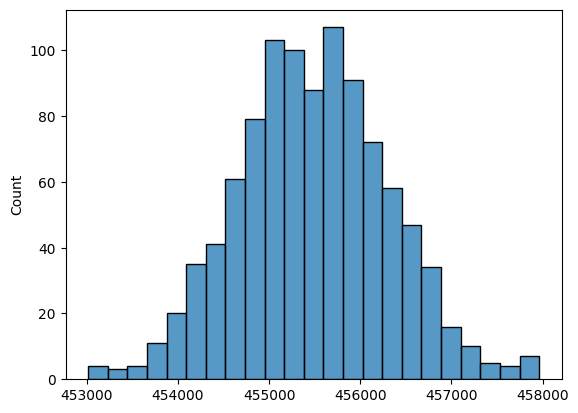

In [74]:
one_data = []
for _ in range(1000):
  sample = np.random.choice(one, size = 10000)
  sample_mean = np.mean(sample)
  one_data.append(sample_mean)
lower_bound = np.percentile(one_data, 2.5)
upper_bound = np.percentile(one_data, 97.5)
print('one_data_mean =',np.mean(one_data).round(2),',','95% C.I is','(',lower_bound.round(2),',',upper_bound.round(2),')',)
print('one_data_std =',np.std(one_data))
sns.histplot(one_data)

two_data mean = 495631.79 , 95% C.I is ( 493793.37 , 497377.44 )
two_data std = 931.211084051935


<Axes: ylabel='Count'>

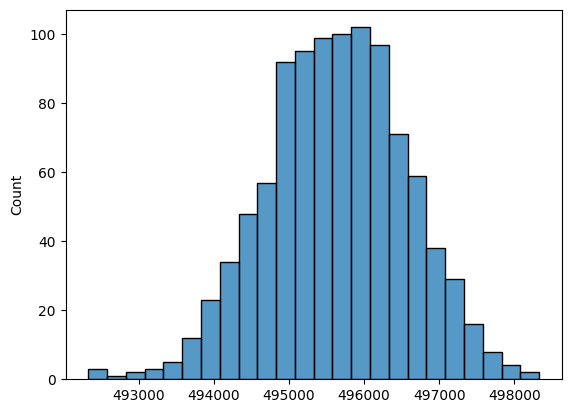

In [75]:
two_data = []
for _ in range(1000):
  sample = np.random.choice(two, size = 10000)
  sample_mean = np.mean(sample)
  two_data.append(sample_mean)
lower_bound = np.percentile(two_data, 2.5)
upper_bound = np.percentile(two_data, 97.5)
print('two_data mean =',np.mean(two_data).round(2),',','95% C.I is','(',lower_bound.round(2),',',upper_bound.round(2),')',)
print('two_data std =',np.std(two_data))
sns.histplot(two_data)

three_data mean = 538406.35 , 95% C.I is ( 536400.77 , 540289.52 )
three_data std = 1000.4813798003669


<Axes: ylabel='Count'>

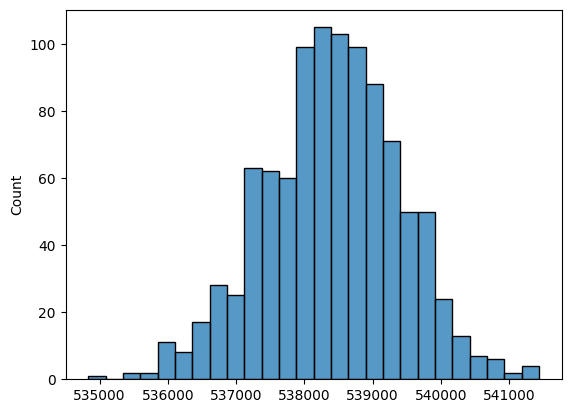

In [76]:
three_data = []
for _ in range(1000):
  sample = np.random.choice(three, size = 10000)
  sample_mean = np.mean(sample)
  three_data.append(sample_mean)
lower_bound = np.percentile(three_data, 2.5)
upper_bound = np.percentile(three_data, 97.5)
print('three_data mean =',np.mean(three_data).round(2),',','95% C.I is','(',lower_bound.round(2),',',upper_bound.round(2),')',)
print('three_data std =',np.std(three_data))
sns.histplot(three_data)

four_data mean = 579440.3 , 95% C.I is ( 577292.23 , 581444.09 )
four_data std = 1084.289866873727


<Axes: ylabel='Count'>

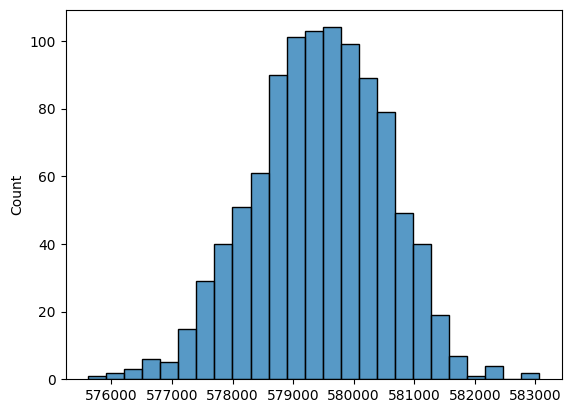

In [77]:
four_data = []
for _ in range(1000):
  sample = np.random.choice(four, size = 10000)
  sample_mean = np.mean(sample)
  four_data.append(sample_mean)
lower_bound = np.percentile(four_data, 2.5)
upper_bound = np.percentile(four_data, 97.5)
print('four_data mean =',np.mean(four_data).round(2),',','95% C.I is','(',lower_bound.round(2),',',upper_bound.round(2),')',)
print('four_data std =',np.std(four_data))
sns.histplot(four_data)

five_data mean = 621479.46 , 95% C.I is ( 619283.07 , 623693.7 )
five_data std = 1104.1254421838073


<Axes: ylabel='Count'>

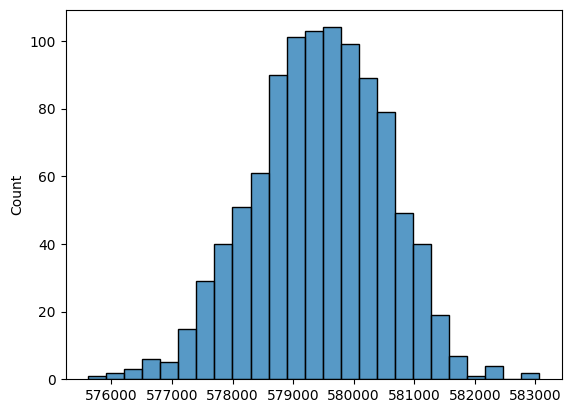

In [78]:
five_data = []
for _ in range(1000):
  sample = np.random.choice(five, size = 10000)
  sample_mean = np.mean(sample)
  five_data.append(sample_mean)
lower_bound = np.percentile(five_data, 2.5)
upper_bound = np.percentile(five_data, 97.5)
print('five_data mean =',np.mean(five_data).round(2),',','95% C.I is','(',lower_bound.round(2),',',upper_bound.round(2),')',)
print('five_data std =',np.std(five_data))
sns.histplot(four_data)

* one_data_mean = 455505.48 , 95% C.I is ( 454023.8 , 457112.5 )
* two_data mean = 495560.666 , 95% C.I is (493823.98 , 497307.63 )
* three_data mean = 538355.06 , 95% C.I is ( 536373.61 , 540316.28 )
* four_data mean = 579337.48 , 95% C.I is ( 577280.17 , 581320.47 )
* five_data mean = 621391.55 , 95% C.I is ( 619213.77 , 623674.8 )


* This observation indicates that a positive correlation between Performance_score and monthly salary, implies that higher performance_score will also tend to be associated with the higher in average monthly salary.

In [80]:
# Average salary based on the job_title and performance_Score
cat_col = df[['Job_Title', 'Performance_Score', 'Monthly_Salary']]
cat_col.groupby(['Job_Title', 'Performance_Score'])['Monthly_Salary'].mean().apply(np.exp).reset_index().head(20)

,Job_Title,Performance_Score,Monthly_Salary
0,Analyst,1,369600.0
1,Analyst,2,403200.0
2,Analyst,3,436800.0
3,Analyst,4,470400.0
4,Analyst,5,504000.0
5,Consultant,1,508200.0
6,Consultant,2,554400.0
7,Consultant,3,600600.0
8,Consultant,4,646800.0
9,Consultant,5,693000.0


**OBSERVATIONS**
* Monthly salary differs across the job_title.
* Monthly salary increase as the performance_score increases.
* There is no significant difference in Monthly_Salary based on Age, Department, Sick_Days, Years of service.
* Since the target variable is continuous, this problem fits into the category of Supervised Learning, specifically Regression, for machine learning.